In [4]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('./data/wine.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [3]:
X = df.iloc[:,0:12]
y = df.iloc[:,12]

In [7]:
# 학습셋과 데이터셋 설정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [8]:
# 모델 구조 설정
 
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                390       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# 모델 실행
# validation_split 0.8 * 0.25 = 0.2
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\keras\engine\data_adapter.py:1516: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/50
8/8 [==============================] - 0s 17ms/step - loss: 1.9310 - accuracy: 0.3387 - val_loss: 0.6772 - val_accuracy: 0.7662
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 0.7384 - accuracy: 0.7539 - val_loss: 0.7215 - val_accuracy: 0.7662
Epoch 3/50
8/8 [==============================] - 0s 4ms/step - loss: 0.6861 - accuracy: 0.7539 - val_loss: 0.6093 - val_accuracy: 0.7662
Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: 0.5593 - accuracy: 0.7539 - val_loss: 0.4799 - val_accuracy: 0.7669
Epoch 5/50
8/8 [==============================] - 0s 4ms/step - loss: 0.4323 - accuracy: 0.7644 - val_loss: 0.3863 - val_accuracy: 0.7954
Epoch 6/50
8/8 [==============================] - 0s 3ms/step - loss: 0.3682 - accuracy: 0.8137 - val_loss: 0.3736 - val_accuracy: 0.8423
Epoch 7/50
8/8 [==============================] - 0s 4ms/step - loss: 0.3536 - accuracy: 0.8525 - val_loss: 0.3522 - val_accuracy: 0.8562
Epoch 8/50
8/8 [=================

In [11]:
# 테스트 결과 출력
score = model.evaluate(X_test, y_test)
print('Test accuracy : ', score[1])

41/41 [==============================] - 0s 467us/step - loss: 0.1827 - accuracy: 0.9292
Test accuracy :  0.9292307496070862


In [13]:
from tensorflow.python.keras.callbacks import ModelCheckpoint

In [17]:
# 모델이 저장되는 조건 설정
modelpath = "./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

In [18]:
# 모델 실행
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\keras\engine\data_adapter.py:1516: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]



Epoch 00001: saving model to ./data/model/all\01-0.9431.hdf5

Epoch 00002: saving model to ./data/model/all\02-0.9423.hdf5

Epoch 00003: saving model to ./data/model/all\03-0.9423.hdf5

Epoch 00004: saving model to ./data/model/all\04-0.9431.hdf5

Epoch 00005: saving model to ./data/model/all\05-0.9431.hdf5

Epoch 00006: saving model to ./data/model/all\06-0.9423.hdf5

Epoch 00007: saving model to ./data/model/all\07-0.9446.hdf5

Epoch 00008: saving model to ./data/model/all\08-0.9438.hdf5

Epoch 00009: saving model to ./data/model/all\09-0.9438.hdf5

Epoch 00010: saving model to ./data/model/all\10-0.9462.hdf5

Epoch 00011: saving model to ./data/model/all\11-0.9446.hdf5

Epoch 00012: saving model to ./data/model/all\12-0.9431.hdf5

Epoch 00013: saving model to ./data/model/all\13-0.9462.hdf5

Epoch 00014: saving model to ./data/model/all\14-0.9492.hdf5

Epoch 00015: saving model to ./data/model/all\15-0.9469.hdf5

Epoch 00016: saving model to ./data/model/all\16-0.9454.hdf5

Epoch 0

In [19]:
# 테스트 결과 출력
score = model.evaluate(X_test, y_test)
print('Test accuracy : ', score[1])

41/41 [==============================] - 0s 424us/step - loss: 0.1099 - accuracy: 0.9562
Test accuracy :  0.9561538696289062


In [20]:
# 모델 실행 (epochs 수정)
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\keras\engine\data_adapter.py:1516: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]



Epoch 00001: saving model to ./data/model/all\01-0.9685.hdf5

Epoch 00002: saving model to ./data/model/all\02-0.9731.hdf5

Epoch 00003: saving model to ./data/model/all\03-0.9715.hdf5

Epoch 00004: saving model to ./data/model/all\04-0.9738.hdf5

Epoch 00005: saving model to ./data/model/all\05-0.9638.hdf5

Epoch 00006: saving model to ./data/model/all\06-0.9692.hdf5

Epoch 00007: saving model to ./data/model/all\07-0.9708.hdf5

Epoch 00008: saving model to ./data/model/all\08-0.9738.hdf5

Epoch 00009: saving model to ./data/model/all\09-0.9738.hdf5

Epoch 00010: saving model to ./data/model/all\10-0.9738.hdf5

Epoch 00011: saving model to ./data/model/all\11-0.9746.hdf5

Epoch 00012: saving model to ./data/model/all\12-0.9715.hdf5

Epoch 00013: saving model to ./data/model/all\13-0.9723.hdf5

Epoch 00014: saving model to ./data/model/all\14-0.9692.hdf5

Epoch 00015: saving model to ./data/model/all\15-0.9708.hdf5

Epoch 00016: saving model to ./data/model/all\16-0.9746.hdf5

Epoch 0

In [21]:
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.098462,0.967411,0.091832,0.968462
1,0.095566,0.967411,0.092239,0.973077
2,0.094839,0.968437,0.094045,0.971538
3,0.096266,0.967924,0.089826,0.973846
4,0.098246,0.966641,0.094039,0.963846
...,...,...,...,...
1995,0.022176,0.993328,0.051243,0.986154
1996,0.022907,0.992558,0.053276,0.983846
1997,0.022476,0.993072,0.052491,0.986154
1998,0.023731,0.992558,0.052102,0.984615


In [22]:
y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

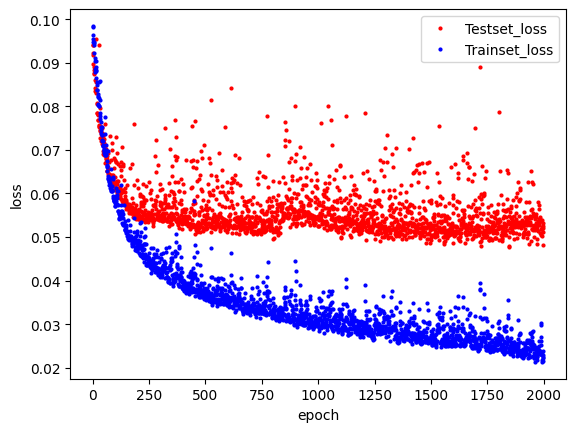

In [25]:
import numpy as np
import matplotlib.pyplot as plt

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label="Testset_loss")
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label="Trainset_loss")

plt.legend(loc="upper right")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()